## Solución Ejercicio 9 - Lab Métodos Computacionales

### Solución usando solve_ivp

In [34]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [35]:
#parámetros
g = 9.8 # m/s^2
l = 0.1 # m
C = 2 # s^(-2)
Omega = 5 # s^(-1)

tiempo = 10 # s
puntos = int(tiempo*200) # numero de puntos a evaluar en la trayectoria

# condiciones iniciales
theta = 0.0 # angulo inicial respecto a la vertical (rad)
omega = 0.0 # velocidad angular inicial respecto a la vertical (rad/s)

def pendulo_forzado(t, w, g, l, C, Omega):
    theta, omega = w
    d_theta_dt = omega
    d_omega_dt = -(g/l)*np.sin(theta) + C*np.cos(theta)*np.sin(Omega*t)
    return [d_theta_dt, d_omega_dt]

In [36]:
def solucion_ecuaciones(cond_ini, g, l, C, Omega, time, puntos):
  t = np.linspace(0, time, puntos)
  args = (g, l, C, Omega)
  sol = integrate.solve_ivp(pendulo_forzado,[0,time],cond_ini,'RK45',t,args=args)
  return sol

cond_ini = np.array([theta, omega])
sol = solucion_ecuaciones(cond_ini, g, l, C, Omega, tiempo, puntos)

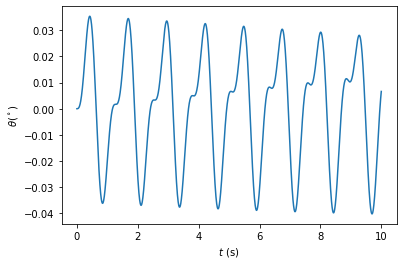

In [40]:
plt.xlabel('$t$ (s)')
plt.ylabel('$\\theta (^\circ)$')
plt.plot(sol["t"], sol["y"][0])

### Solución del ejercicio implementando Runge Kutta

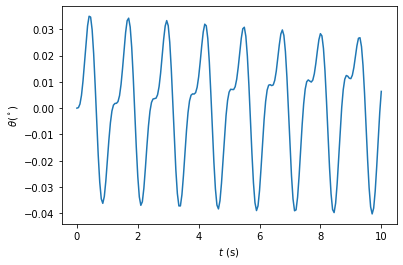

In [53]:
#parámetros
g = 9.8 # m/s^2
l = 0.1 # m
C = 2 # s^(-2)
Omega = 5 # s^(-1)

# condiciones iniciales
theta = 0.0 # angulo inicial respecto a la vertical (rad)
omega = 0.0 # velocidad angular inicial respecto a la vertical (rad/s)

y0 = np.array([theta, omega])
t0 = 0
tf = 10
h = 0.05

def pendulo_forzado(t, w, g = g, l = l, C = C, Omega = Omega):
    theta, omega = w
    d_theta_dt = omega
    d_omega_dt = -(g/l)*np.sin(theta) + C*np.cos(theta)*np.sin(Omega*t)
    return np.array([d_theta_dt, d_omega_dt])

def runge_kutta_cuarto_orden(f, y0, t0, tf, h):
    ys = [y0]
    for t in np.arange(t0, tf, h):
        k1 = h*f(t, y0)
        k2 = h*f(t+h/2, y0 + k1/2)
        k3 = h*f(t+h/2, y0 + k2/2)
        k4 = h*f(t+h, y0 + k3)      
        y1 = y0 + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        ys.append(y1)
        y0 = y1
        
    return np.linspace(t0, tf, len(ys)), np.array(ys)

t, y_rk4 = runge_kutta_cuarto_orden(pendulo_forzado, y0, t0, tf, h)
plt.xlabel('$t$ (s)')
plt.ylabel('$\\theta (^\circ)$')
plt.plot(t, y_rk4[:, 0])